In [28]:
import cv2
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(7, 5)

In [29]:
equirectangular_image = cv2.imread("C:/Users/paulo/Pictures/equi2.png", cv2.IMREAD_COLOR)

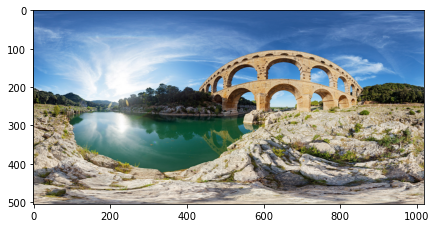

In [30]:
plt.imshow(cv2.cvtColor(equirectangular_image, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
eq_h, eq_w, _ =  equirectangular_image.shape

eq_cx = eq_w // 2.0
eq_cy = eq_h // 2.0

They should be equal

In [32]:
delta = 180/eq_h
#delta_w = eq_w/360

In [33]:
print(f'{delta} degrees per pixel')

0.3564356435643564 degrees per pixel


In [34]:
phi = 45
theta = 180



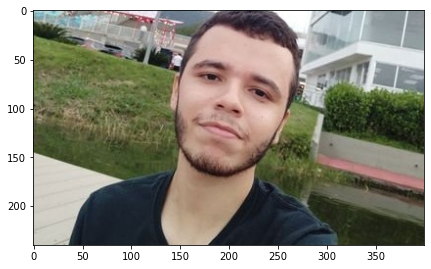

In [35]:
face_image = cv2.imread("C:/Users/paulo/Pictures/Profile/cropped.jpg", cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
plt.show()


In [36]:
face_image.shape

(240, 400, 3)

In [37]:
#assuming that the height of the image projected is 1

r_h = 0.5
r_w = (face_image.shape[1]/face_image.shape[0])*r_h

In [38]:
y_axis = np.array([0.0, 1.0, 0.0], np.float32)*-phi
z_axis = np.array([0.0, 0.0, 1.0], np.float32)*-theta

M1 = cv2.Rodrigues(z_axis)[0]
M2 = cv2.Rodrigues(y_axis)[0]
M = np.dot(M1,M2)


for i in range(eq_h):
    for j in range(eq_w):
        
        dtheta = np.radians((j - eq_cx)*delta)
        dphi = np.radians((i - eq_cy)*delta)
        
        p_x = np.cos(dphi) * np.cos(dtheta);
        p_y = np.cos(dphi) * np.sin(dtheta);
        p_z = np.sin(dphi);
        
        p0 = np.array([p_x,p_y,p_z])     
        
        
        p1 = np.dot(p0, M)
        
        dtheta = np.arctan2(p1[1], p1[0]);
        dphi = np.arcsin(p1[2])
        
        
        #if abs(dx) <= 180:
        if True:
        
            tanx = np.tan(dtheta) + r_w/2
            tany = np.tan(dphi) + r_h/2
            
            #tanx = np.sin(dx*np.pi/180) + r_w/2
            #tany = np.cos(dy*np.pi/180) + r_h/2
            
            if tanx >= 0 and tanx <= r_w and tany>=0 and tany<=r_h:
                
                posx = int((tanx/r_w) * face_image.shape[1])
                posy = int((tany/r_h) * face_image.shape[0])
                
                if posx >=0 and posx < face_image.shape[1] and posy >= 0 and posy <= face_image.shape[0]:                
                    equirectangular_image[i,j] = face_image[posy, posx]
        

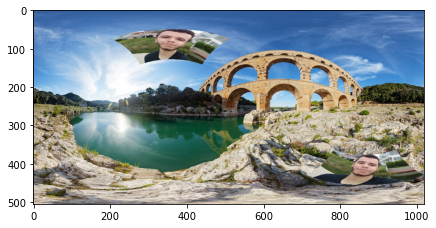

In [39]:
plt.imshow(cv2.cvtColor(equirectangular_image, cv2.COLOR_BGR2RGB))
plt.show()